<h1> MLP Training and Testing </h1>

<h3>Sample code to train and test a simple MLP with CSI data extracted from a variational autoencoder. </h3>

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from safetensors.torch import load_file

In [6]:
def load_latent_data(latent_space_dir, window_size, seed, dist_type):
    """
    Loads and merges latent data for a given configuration.
    """
    all_features = []
    all_labels = None
    num_antennas = 4

    for antenna_idx in range(num_antennas):
       
       
        dist_tag = dist_type[:4] 
        filename = f"{dist_tag}_win{window_size}_ant{antenna_idx}_seed{seed}.safetensors"
        path = os.path.join(latent_space_dir, filename)
        
        if not os.path.exists(path):
            raise FileNotFoundError(f"File not found: {path}")
            
       
        loaded_tensors = load_file(path)
        
        
        features = loaded_tensors["latent_space"].numpy()
        labels = loaded_tensors["labels"].numpy()
        
        all_features.append(features)
        
        if all_labels is None:
            all_labels = labels
        elif not np.array_equal(all_labels, labels):
            raise ValueError("Labels do not match between antenna files!")

    fused_features = np.concatenate(all_features, axis=1)
    return fused_features, all_labels

In [7]:
def train_and_evaluate(features, labels, dist_type, window_size, seed, output_dir):
    """
        This function remains unchanged, as it works with NumPy arrays.    
    """
    
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.3, random_state=42, stratify=labels
    )
    
    print("SVM classifier training...")
    classifier = SVC(kernel='rbf', C=1.0, random_state=42)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy of the classifier: {accuracy:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix (Accuracy: {accuracy:.4f})')

    image_filename = f"{dist_type[:4]}_win{window_size}_seed{seed}_cm.png"
    full_save_path = os.path.join(output_dir, image_filename)
    
    plt.savefig(full_save_path)
    print(f"Confusion matrix saved to: {full_save_path}")




    plt.show()
    plt.close()


--- CLASSIFICATION for Dist=gaussian, Window=450, Seed=42 ---
SVM classifier training...
Accuracy of the classifier: 0.9947
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win450_seed42_cm.png


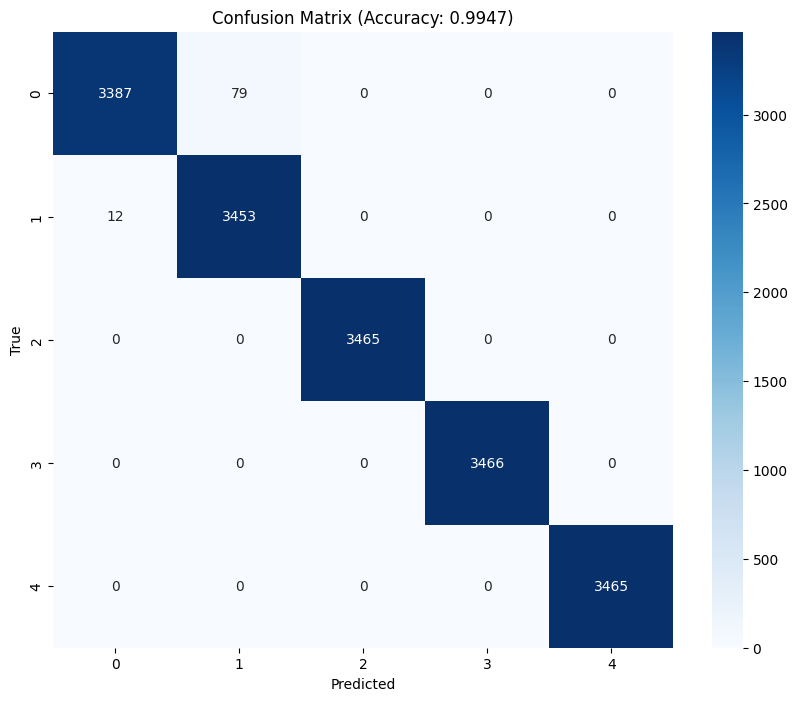

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=450, Seed=123 ---
SVM classifier training...
Accuracy of the classifier: 0.9950
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win450_seed123_cm.png


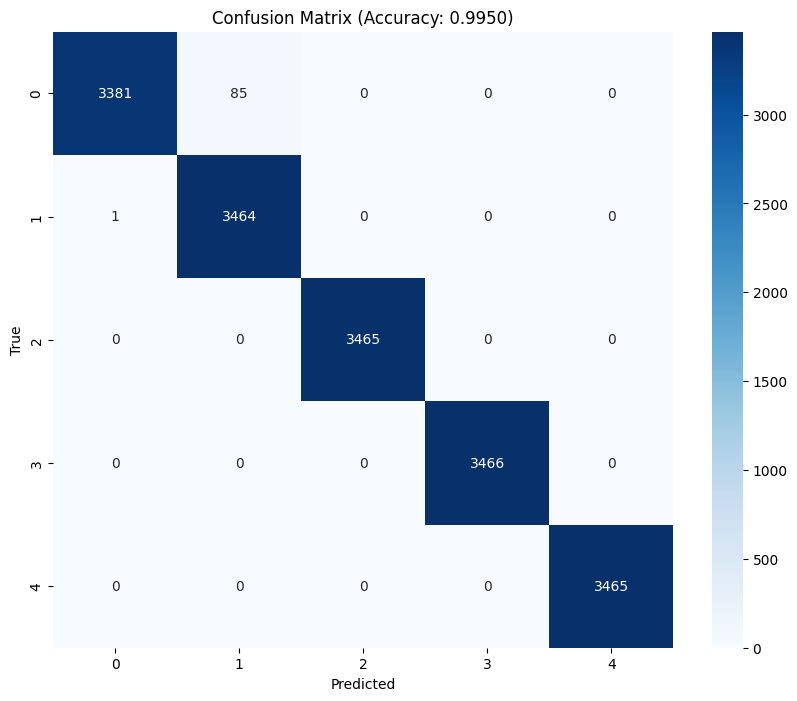

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=450, Seed=2024 ---
SVM classifier training...
Accuracy of the classifier: 0.9986
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win450_seed2024_cm.png


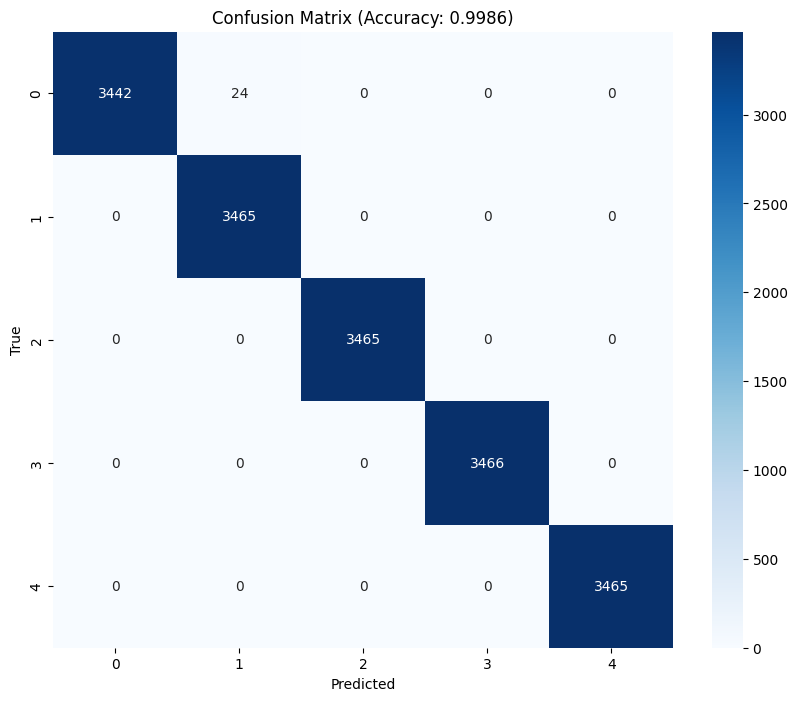

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=300, Seed=42 ---
SVM classifier training...
Accuracy of the classifier: 0.9703
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win300_seed42_cm.png


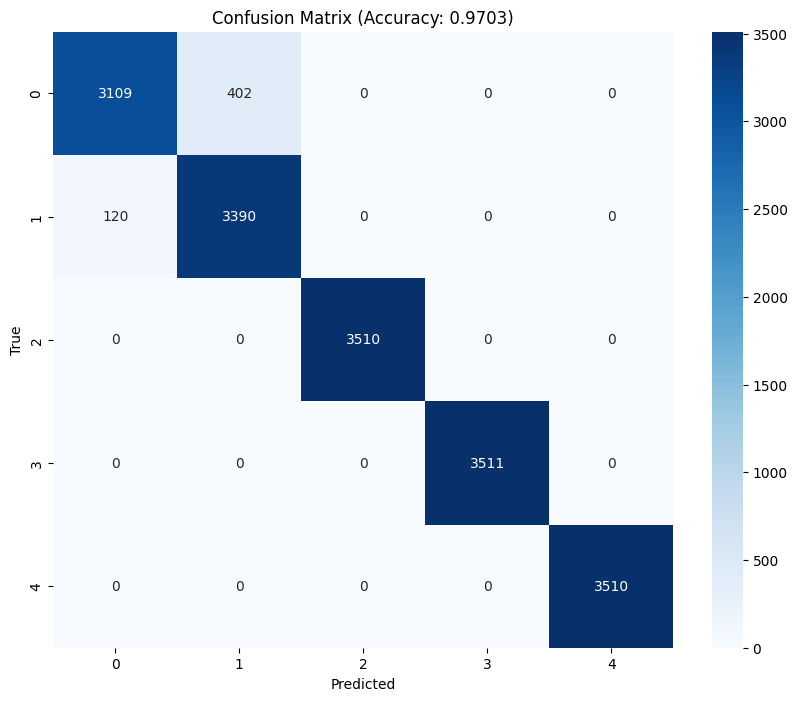

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=300, Seed=123 ---
SVM classifier training...
Accuracy of the classifier: 0.9779
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win300_seed123_cm.png


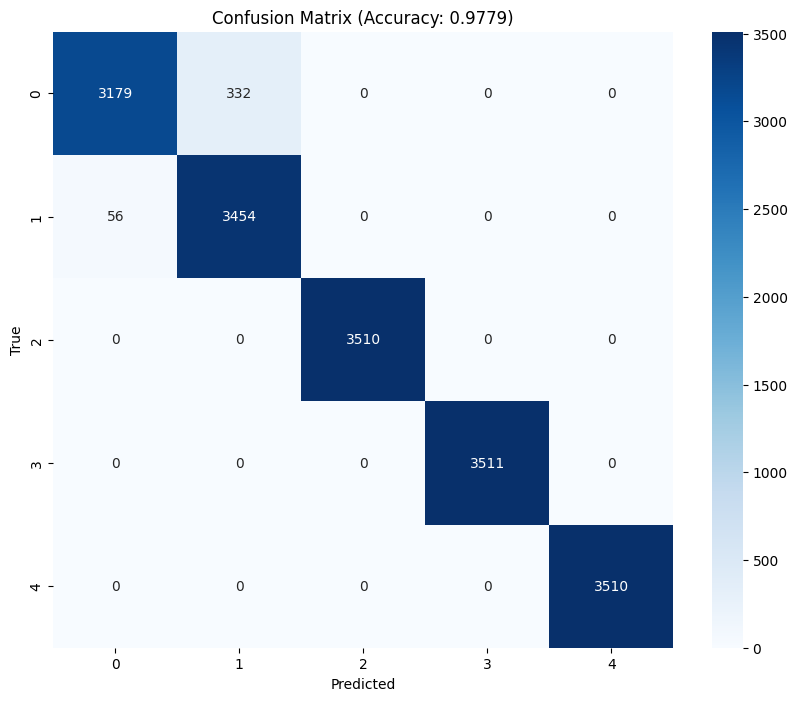

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=300, Seed=2024 ---
SVM classifier training...
Accuracy of the classifier: 0.9742
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win300_seed2024_cm.png


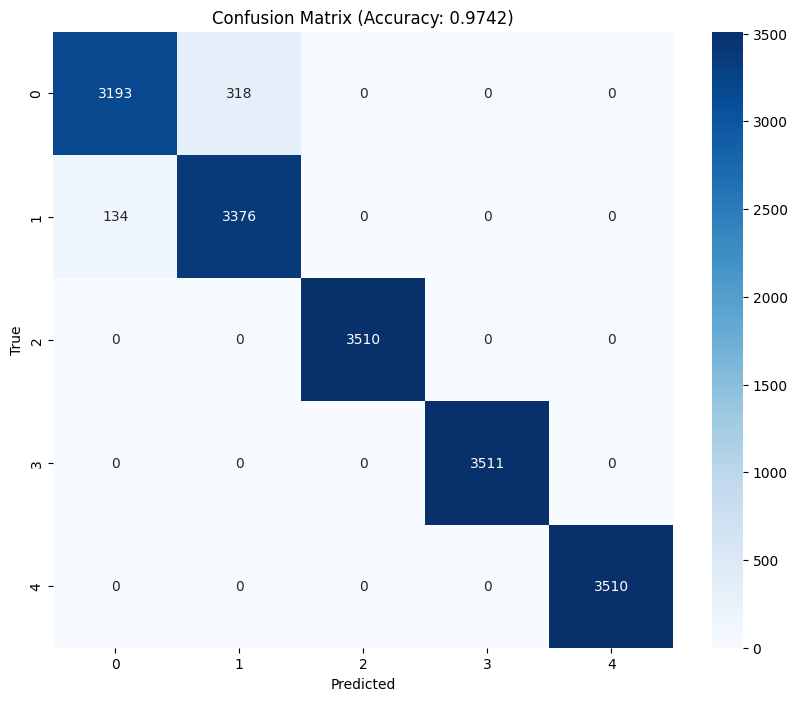

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=150, Seed=42 ---
SVM classifier training...
Accuracy of the classifier: 0.9512
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win150_seed42_cm.png


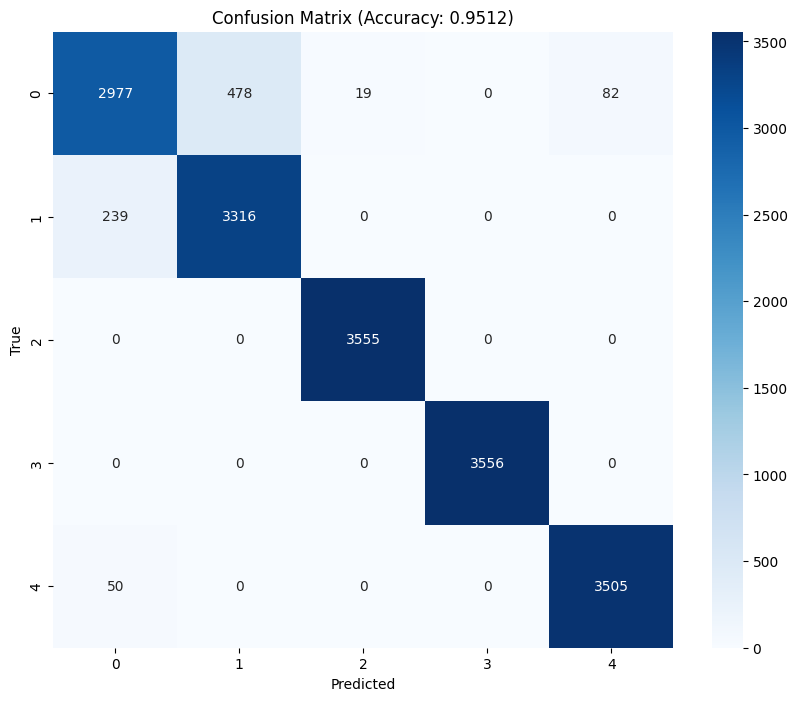

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=150, Seed=123 ---
SVM classifier training...
Accuracy of the classifier: 0.9218
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win150_seed123_cm.png


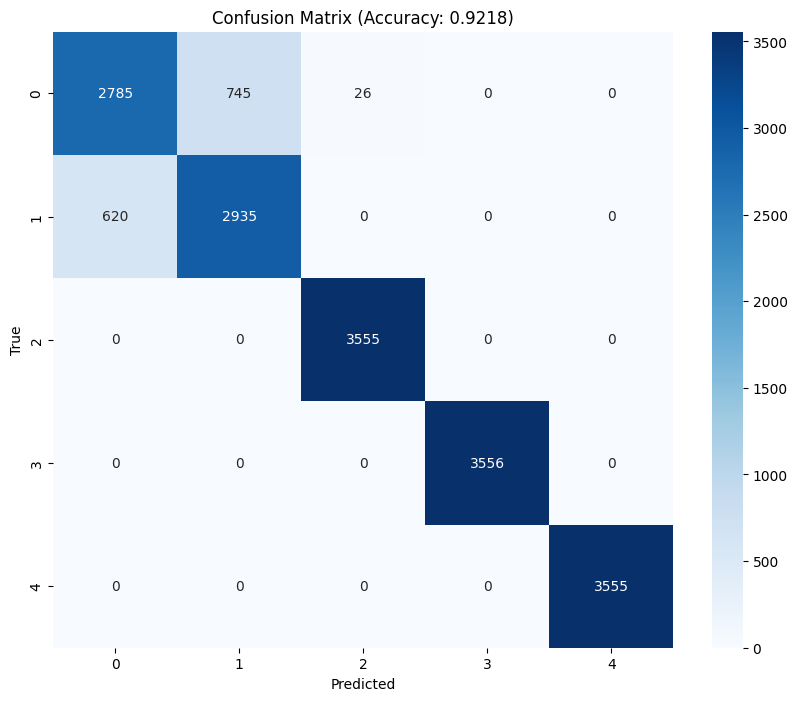

--------------------------------------------------
--- CLASSIFICATION for Dist=gaussian, Window=150, Seed=2024 ---
SVM classifier training...
Accuracy of the classifier: 0.9540
Confusion matrix saved to: ../ResultSVCTraining/Experiment_gaussian\gaus_win150_seed2024_cm.png


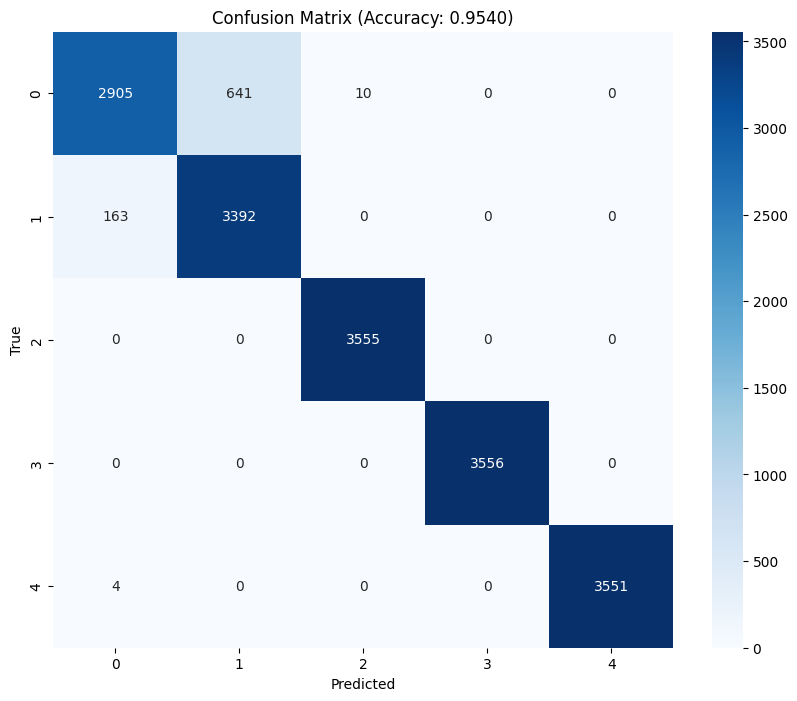

--------------------------------------------------


In [8]:
if __name__ == "__main__":
    
    # Choose with distribution that you want to test
    dist_type_to_test = "gaussian"
    
   
    latent_space_dir = f"../dataset/latent_space_dataset_{dist_type_to_test}"

    # --- MODIFICA 3: Creiamo la cartella per le immagini ---
    output_image_dir = f"../ResultSVCTraining/Experiment_{dist_type_to_test}"
    os.makedirs(output_image_dir, exist_ok=True)
    
    window_sizes_to_test = [450, 300, 150]
    random_seeds = [42, 123, 2024]
    
    for window_size in window_sizes_to_test:
        for seed in random_seeds:
            print(f"--- CLASSIFICATION for Dist={dist_type_to_test}, Window={window_size}, Seed={seed} ---")
            try:
                features, labels = load_latent_data(latent_space_dir, window_size, seed, dist_type_to_test)
                train_and_evaluate(features, labels, dist_type_to_test, window_size, seed, output_image_dir)
            except FileNotFoundError as e:
                print(e)
            print("-" * 50)